In [1]:
import cira

cira.auth.KEY_FILE = "../../alpc_key.json"
assert cira.auth.check_keys(), "the set keys dose not work"

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from os.path import exists

In [3]:
SYMBOL = "INTC"
SYM_HIST_FILE = f'./{SYMBOL.replace("/", "_")}.csv'

ast = cira.Stock(SYMBOL)


if not exists(SYM_HIST_FILE): # chacheing historical data  
    start = datetime(2000, 1, 1)
    end = datetime.now().date() 
    ast.save_historical_data(SYM_HIST_FILE, start, end)

data = ast.load_historical_data(SYM_HIST_FILE)
data.head()

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2016-01-04 05:00:00+00:00,INTC,26.96,27.06,26.62,27.05,32165978.0,122840.0,26.88
2016-01-05 05:00:00+00:00,INTC,27.02,27.05,26.68,26.92,17905707.0,87505.0,26.85
2016-01-06 05:00:00+00:00,INTC,26.46,26.67,26.10,26.32,26939523.0,121984.0,26.39
2016-01-07 05:00:00+00:00,INTC,25.68,26.26,25.33,25.33,41368839.0,163862.0,25.63
2016-01-08 05:00:00+00:00,INTC,25.53,25.64,25.01,25.07,32404640.0,142641.0,25.31


<Axes: xlabel='timestamp'>

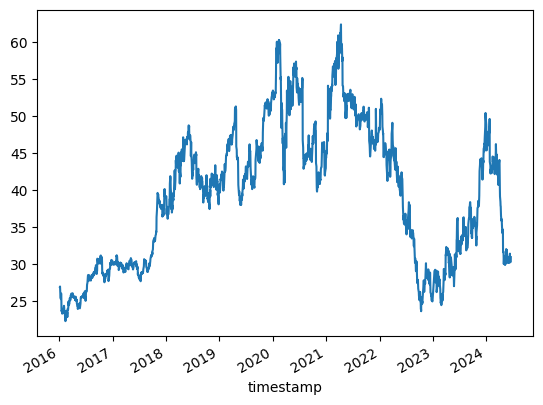

In [4]:
data["open"].plot()

<Axes: xlabel='timestamp'>

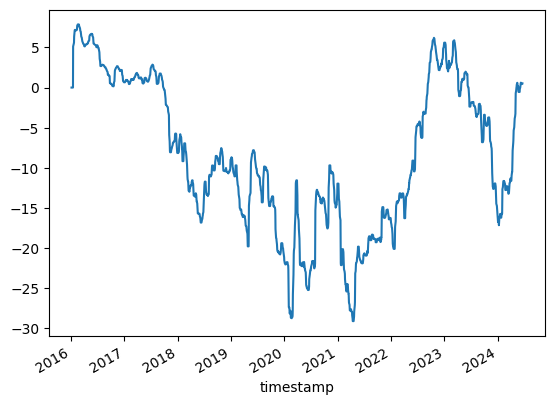

In [5]:
data["diff"] = (data["open"].values[-1] - data["open"]).rolling(10).median()
data["diff"] = data["diff"].fillna(0)
data["diff"].plot()

In [6]:
classes = {
    "nueatral": 0,
    "light_buy": 1,
    "light_sell": 2,
    "hard_buy": 3,
    "hard_sell":4,
}

<Axes: xlabel='signal'>

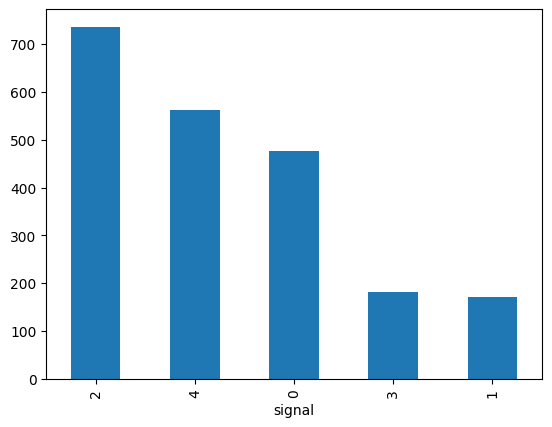

In [7]:
LITE = 100
HARD = 1400

data["signal"] = classes["nueatral"]
data.loc[data["diff"] > 2, "signal"] = classes["light_buy"]
data.loc[data["diff"] < -5, "signal"] = classes["light_sell"]
data.loc[data["diff"] > 4, "signal"] = classes["hard_buy"]
data.loc[data["diff"] < -15, "signal"] = classes["hard_sell"]
data["signal"].value_counts().plot.bar()

In [8]:
data.drop(columns=["symbol"], inplace=True)
data.head()

,open,high,low,close,volume,trade_count,vwap,diff,signal
timestamp,,,,,,,,,
2016-01-04 05:00:00+00:00,26.96,27.06,26.62,27.05,32165978.0,122840.0,26.88,0.0,0
2016-01-05 05:00:00+00:00,27.02,27.05,26.68,26.92,17905707.0,87505.0,26.85,0.0,0
2016-01-06 05:00:00+00:00,26.46,26.67,26.10,26.32,26939523.0,121984.0,26.39,0.0,0
2016-01-07 05:00:00+00:00,25.68,26.26,25.33,25.33,41368839.0,163862.0,25.63,0.0,0
2016-01-08 05:00:00+00:00,25.53,25.64,25.01,25.07,32404640.0,142641.0,25.31,0.0,0


In [9]:
split_prc = 0.8
train_data = data.iloc[:int(len(data)*split_prc)]
test_data =  data.iloc[int(len(data)*split_prc):]
print(len(data), len(train_data), len(test_data))
assert len(data) == len(train_data) + len(test_data)

2129 1703 426


<Axes: xlabel='timestamp'>

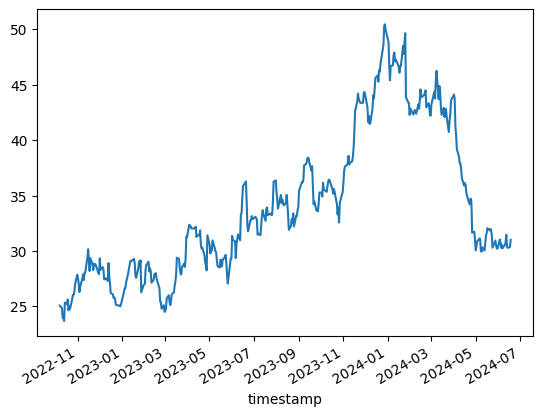

In [10]:
test_data["open"].plot()

In [11]:
X = train_data.drop(columns=["signal", "diff"], inplace=False).values
y = train_data["signal"].values

X.shape, y.shape

((1703, 7), (1703,))

In [12]:
X_test = test_data.drop(columns=["signal", "diff"], inplace=False).values
y_test = test_data["signal"].values

X_test.shape, y_test.shape

((426, 7), (426,))

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score



model = MLPClassifier(
            solver="adam",
            hidden_layer_sizes=(10, 10, 10), 
            activation="relu",
            alpha=1e-4, 
            max_iter=600,
            learning_rate_init=0.01,
            verbose=True,
        )

model = model.fit(X, y)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred, normalize=True)

Iteration 1, loss = 1.38179290
Iteration 2, loss = 1.17993093
Iteration 3, loss = 1.03178173
Iteration 4, loss = 0.90684525
Iteration 5, loss = 0.80034184
Iteration 6, loss = 0.71742288
Iteration 7, loss = 0.63466930
Iteration 8, loss = 0.53719789
Iteration 9, loss = 0.45588184
Iteration 10, loss = 0.36507389
Iteration 11, loss = 0.32887710
Iteration 12, loss = 0.29994036
Iteration 13, loss = 0.29411547
Iteration 14, loss = 0.28224165
Iteration 15, loss = 0.27466425
Iteration 16, loss = 0.27872298
Iteration 17, loss = 0.27477494
Iteration 18, loss = 0.26826362
Iteration 19, loss = 0.27834575
Iteration 20, loss = 0.26018399
Iteration 21, loss = 0.24971618
Iteration 22, loss = 0.24878558
Iteration 23, loss = 0.24923025
Iteration 24, loss = 0.24343182
Iteration 25, loss = 0.24165070
Iteration 26, loss = 0.23545103
Iteration 27, loss = 0.24505802
Iteration 28, loss = 0.25116150
Iteration 29, loss = 0.25730502
Iteration 30, loss = 0.23595947
Iteration 31, loss = 0.23870948
Iteration 32, los

0.11971830985915492

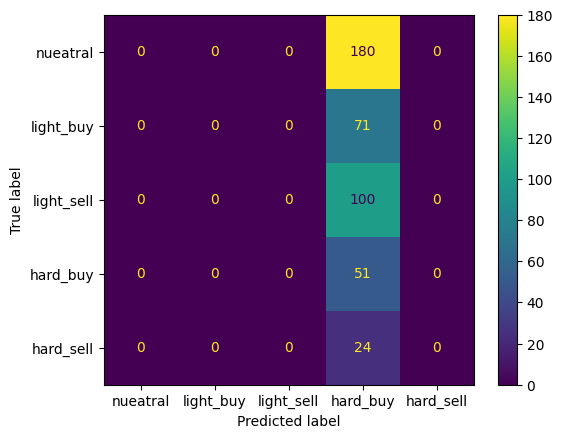

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(classes.keys()))
cmd.plot()


In [16]:
data.keys()

Index(['open', 'high', 'low', 'close', 'volume', 'trade_count', 'vwap', 'diff',
       'signal'],
      dtype='object')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001, solver=adam; total time=   0.8s
[CV] END activation=re

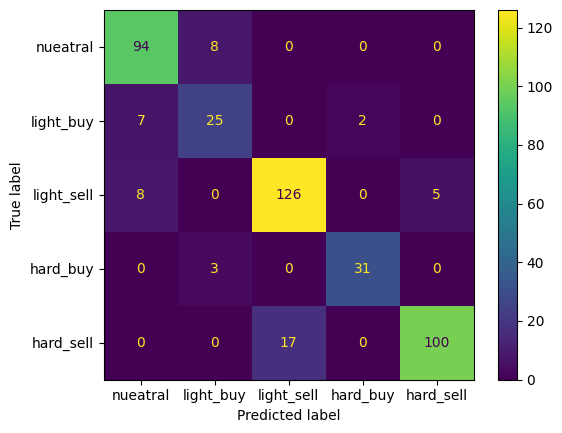

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd

df = data 
X = df.drop(columns=["signal", "diff"], inplace=False)
y = df['signal']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

model = MLPClassifier(max_iter=1000, early_stopping=True)

param_grid = {
    'hidden_layer_sizes': [(10, 10, 10), (50, 50, 50), (100, 100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [1e-4, 1e-3, 1e-2],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(classes.keys()))
cmd.plot()

In [18]:
model = best_model

In [19]:
split_prc = 0.3
train_data = data.iloc[:int(len(data)*split_prc)]
test_data =  data.iloc[int(len(data)*split_prc):]
print(len(data), len(train_data), len(test_data))
assert len(data) == len(train_data) + len(test_data)

X_test = test_data.drop(columns=["signal", "diff"], inplace=False).values
y_test = test_data["signal"].values

X_test.shape, y_test.shape

2129 638 1491


((1491, 7), (1491,))

## cira strat

In [20]:

from numpy import ndarray
from pandas import DataFrame


class MLP_Strategy(cira.strategy.Strategy):
    def __init__(self, model:MLPClassifier, scaler: StandardScaler) -> None:
        super().__init__(name="MLP")
        self.model = model
        self.allocation = list()
        self.scaler = scaler
        self.preds = []

    def iterate(self, feature_data: DataFrame, prices: DataFrame, portfolio: ndarray, cash:float) -> ndarray:
        X_scaled = self.scaler.transform(feature_data)
        pred = model.predict(X_scaled)[-1]
        self.preds.append(pred)
        max_al = (cash / prices.values[-1])[0]
        max_sell = (portfolio[-1] / prices.values[-1])[0]
        actions = {
            classes["nueatral"]: 0,
            classes["light_buy"]: max_al*0.01,
            classes["light_sell"]: -max_sell*0.2,
            classes["hard_buy"]: max_al*0.5,
            classes["hard_sell"]: -max_sell*0.8,
        }

        al = np.array([actions[pred]])
        #al = np.array([0])
        self.allocation.append(portfolio[-1])
        return al 

Delta: 6971.76$


<Axes: xlabel='timestamp'>

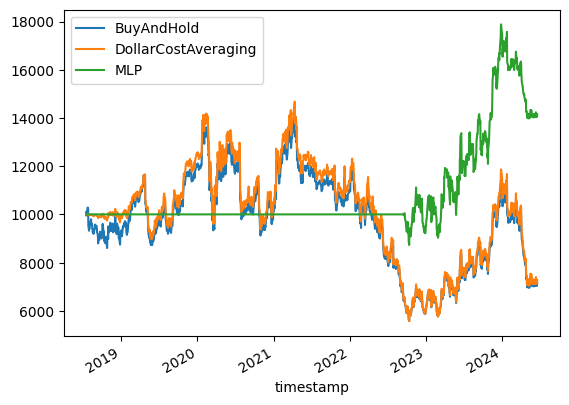

In [21]:
strat = MLP_Strategy(model, scaler)
X_backtest = test_data.drop(columns=["signal", "diff"], inplace=False)
bt = cira.strategy.multi_strategy_backtest([cira.strategy.ByAndHold(), cira.strategy.DollarCostAveraging(1), strat], X_backtest, X_backtest["open"].to_frame(), 10_000)
print(f"Delta: {bt[strat.name].values[-1] - bt['BuyAndHold'].values[-1]:.2f}$")
bt.plot()

<Axes: xlabel='timestamp'>

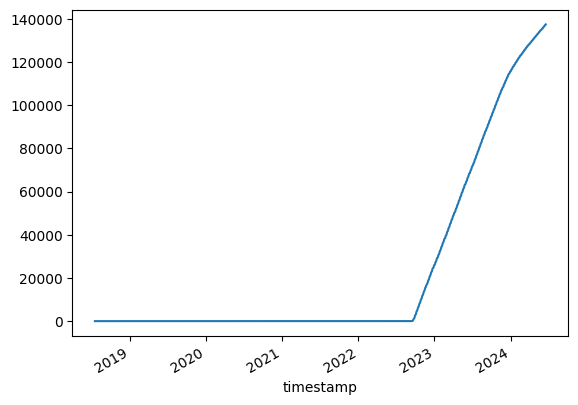

In [22]:
s_all = pd.DataFrame({"allocation":strat.allocation})
s_all.set_index(test_data.index,inplace=True)
s_all["allocation"].cumsum().plot()

<Axes: xlabel='preds'>

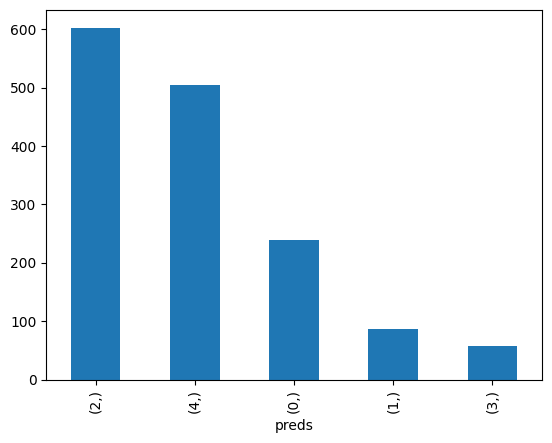

In [23]:
pred_all = pd.DataFrame({"preds":strat.preds})
pred_all.value_counts().plot.bar()
